# Task 2: Sentiment and Thematic 
```
 Analyze customer reviews to extract key recurring themes using NLP techniques (TF-IDF, N-grams).
 This will help banks understand major pain points and satisfaction drivers.
 ```

In [9]:
# Import Libraries
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

!python -m spacy download en_core_web_sm
# Download NLTK stopwords
nltk.download('stopwords')

# Load English tokenizer, POS tagger, lemmatizer, etc.
nlp = spacy.load("en_core_web_sm")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

KeyboardInterrupt: 

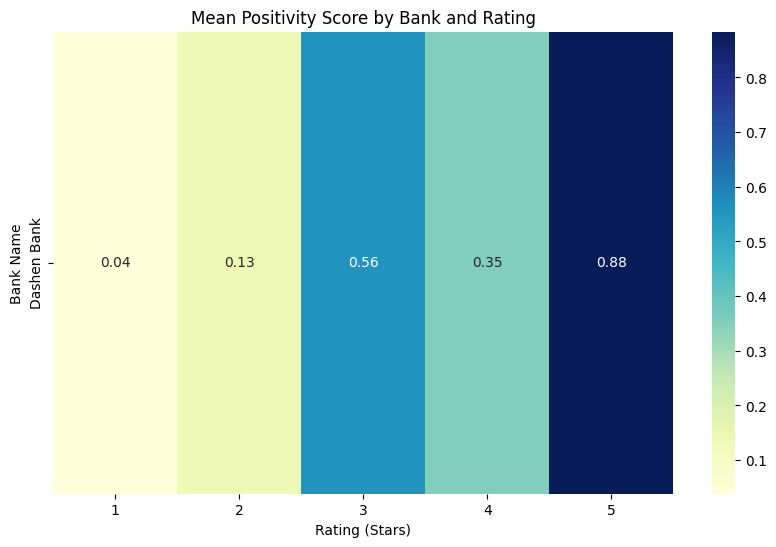

In [ ]:
# Load data with sentiment labels
df = pd.read_csv('../data/bank_reviews_bert_sentiment.csv')

print(f"Total Reviews Loaded: {df.shape[0]}")
df.head()

In [ ]:
#text processing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]
    return ' '.join(tokens)

df['preprocessed_review'] = df['clean_review'].apply(preprocess_text)

df[['clean_review', 'preprocessed_review']].head()


In [ ]:
# TF-IDF for unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000)

# Fit and transform the preprocessed reviews
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_review'])

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sum up the TF-IDF scores for each term
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a DataFrame of terms and their TF-IDF scores
tfidf_df = pd.DataFrame({'term': feature_names, 'score': tfidf_scores})

# Sort by score
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

tfidf_df.head(20)

In [ ]:
# visualize top key words
plt.figure(figsize=(12,6))
sns.barplot(data=tfidf_df.head(20), x='score', y='term', palette='Set2')
plt.title('Top 20 Keywords (Unigrams + Bigrams)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.show()


In [ ]:
# rule based thematic analysis
# Define themes and their associated keywords
theme_keywords = {
    'Account Access Issues': ['login', 'password', 'authentication', 'reset', 'verify'],
    'Transaction Performance': ['transfer', 'transaction', 'fail', 'slow', 'delay'],
    'User Interface & Experience': ['interface', 'design', 'navigation', 'user friendly'],
    'Customer Support': ['customer support', 'help', 'service', 'assistance', 'feedback'],
    'Feature Requests': ['fingerprint login', 'notification', 'update', 'feature', 'multi language'],
}

# Function to assign a theme based on keywords
def assign_theme(text):
    for theme, keywords in theme_keywords.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return 'Other'

df['theme'] = df['preprocessed_review'].apply(assign_theme)

df[['clean_review', 'preprocessed_review', 'theme']].head(10)

In [ ]:
# Save the final dataset with themes
output_file = '../data/bank_reviews_themes.csv'
df.to_csv(output_file, index=False)
print(f" Thematic analysis results saved to {output_file}")

In [ ]:
# visualize theme distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='theme', order=df['theme'].value_counts().index, palette='Set2')
plt.title('Distribution of Identified Themes')
plt.xlabel('Number of Reviews')
plt.ylabel('Theme')
plt.show()
